In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Multinomial Naive Bayes on Headlines Only

In [282]:
df = pd.read_csv('features.csv', sep='|', index_col=0)
df['Company'].value_counts()

Facebook          1977
Twitter            902
Alibaba            544
Groupon            426
General Motors     368
LinkedIn           193
Snapchat           185
Blue Apron         125
Fitbit             114
Etsy               104
Shake Shack        103
GoPro               91
Workday             90
Ferrari             46
Stitch Fix          33
Name: Company, dtype: int64

In [283]:
df.head()

,Headline,Source,Date,Word Count,Company,Industry,IPO Period,Day of Week,Source Tier,PositiveScore,...,Mngr2,Mngr3,Mngr4,Mngr5,Mngr6,Offer Date +90,Date_y,Close +90,% Px Chng +90,Label
0,FACEBOOK ROLLS OUT NEW ADS TO WOO MADISON AVEN...,Aberdeen American News,2012-02-29,358,Facebook,Technology,1,4,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
1,FACEBOOK PRICES ITS STOCK AT $38 A SHARE FOR IPO,Aberdeen American News,2012-05-17,515,Facebook,Technology,1,5,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
2,REGULATORS LOOKING INTO MORGAN STANLEY ROLE IN...,Aberdeen American News,2012-05-22,288,Facebook,Technology,2,3,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
3,"FACEBOOK, MORGAN STANLEY FACE CLASS-ACTION SUI...",Aberdeen American News,2012-05-23,583,Facebook,Technology,2,4,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
4,FAQ: Facebook's IPO,Abilene Reporter-News,2012-02-03,947,Facebook,Technology,1,6,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative


## Tried Removing Facebook Since it Represented a Disproportionate Number of Instances

In [284]:
df_woFB = df[df['Company'] != 'Facebook']
df_woFB['Company'].value_counts()

Twitter           902
Alibaba           544
Groupon           426
General Motors    368
LinkedIn          193
Snapchat          185
Blue Apron        125
Fitbit            114
Etsy              104
Shake Shack       103
GoPro              91
Workday            90
Ferrari            46
Stitch Fix         33
Name: Company, dtype: int64

In [285]:
## Replacing all the numbers in the text to 'NUM_' to simplify and reduce total featues

text_data = df_woFB['Headline'].replace('\d+', 'NUM_', regex=True)
text_data

1977                                   LinkedIn to an IPO
1978                               LinkedIn IPO; the work
1979    LinkedIn shares begin trading following IPO; A...
1980                    Stocks follow LinkedIn IPO higher
1981       LinkedIn Eyes IPO Price of $NUM_-$NUM_ a Share
1982    Could The LinkedIn IPO Be A Top In Social Medi...
1983                     LinkedIn Raises IPO Terms (LNKD)
1984    LinkedIn Corporation Prices IPO at $NUM_ per S...
1985    Could The LinkedIn IPO Be A Top In Social Medi...
1986                             LinkedIN Rocket Ship IPO
1987            LinkedIn Now Up Over NUM_% From IPO Price
1988    LinkedIn Breaks $NUM_.NUM_, Currently Up Over ...
1989    LinkedIn (LNKD) IPO Soars, Boosts Internet Stocks
1990                       Renren Jumping On LinkedIn IPO
1991    David Menlow, President of IPO Financial, Disc...
1992    Is the LinkedIn IPO Proof That We Are in a Bub...
1993    Social Media Giant LinkedIn Trading Near Lowes...
1994    How to

In [286]:
vectorizer = CountVectorizer(analyzer='word', stop_words='english')

In [287]:
vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [288]:
vectorizer.get_feature_names()
#vectorizer.vocabulary_

['abandons',
 'abercrombie',
 'ability',
 'able',
 'abound',
 'abounding',
 'accelerate',
 'acceleration',
 'access',
 'accessibility',
 'according',
 'account',
 'accounting',
 'accounts',
 'accused',
 'achilles',
 'ackaman',
 'acquired',
 'acquisition',
 'acquisitions',
 'acsoi',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'ad',
 'adapt',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'addressed',
 'adds',
 'admits',
 'adp',
 'adrs',
 'ads',
 'advance',
 'adventure',
 'advertisers',
 'advertisi',
 'advertising',
 'advice',
 'advise',
 'adviser',
 'advisers',
 'affair',
 'affect',
 'affected',
 'affects',
 'affordable',
 'aflutter',
 'afraid',
 'agency',
 'agenda',
 'agent',
 'aggregate',
 'ago',
 'agreements',
 'agrees',
 'ah',
 'ahead',
 'ailing',
 'aim',
 'aiming',
 'aims',
 'ain',
 'airlines',
 'akerson',
 'alarms',
 'alert',
 'alibaba',
 'allay',
 'allies',
 'allowed',
 'allows',
 'allure',
 'alwaleed',
 'amazon',
 'ambitions',
 'ambitious',
 'amended',
 'am

In [289]:
pd.DataFrame.from_dict(vectorizer.vocabulary_, orient='index').sort_values(by=0, ascending=False)

,0
œtwitter,3460
œquiet,3459
œlife,3458
zynga,3457
zuckerberg,3456
zuck,3455
zone,3454
zoetis,3453
zipcar,3452
zero,3451


#### Transform to Document Term Matrix

In [290]:
dtm = vectorizer.transform(text_data)
dtm

<3324x3461 sparse matrix of type '<class 'numpy.int64'>'
	with 25744 stored elements in Compressed Sparse Row format>

In [291]:
Text_Features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
Text_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Columns: 3461 entries, abandons to œtwitter
dtypes: int64(3461)
memory usage: 87.8 MB


In [292]:
#Text_Features.to_csv('TEXT_FEATURES.csv')

In [293]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

X = Text_Features
y = np.array(df_woFB['Label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(2493, 3461) (2493,)


In [294]:
nb = MultinomialNB()

In [295]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [296]:
y_pred_class = nb.predict(X_test)

In [297]:
metrics.accuracy_score(y_test, y_pred_class)

0.99518652226233451

In [298]:
df_woFB['Label'].value_counts()

Positive    2245
Negative    1079
Name: Label, dtype: int64

## Yellowbrick Classification Report

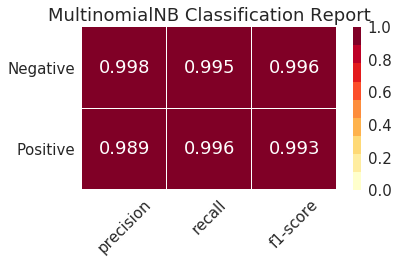

In [299]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Positive', 'Negative'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

## Confusion Matrix

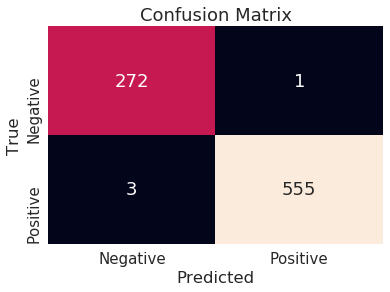

In [300]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

# Same Analysis on Story Text

In [301]:
stories = pd.read_csv('Text.csv', index_col=0)
stories

,Text,Label
0,Facebook wooed Madison Avenue on Wednesday wit...,Negative
1,Facebook Inc. priced its shares in its initial...,Negative
2,NEW YORK -- Securities regulators are amping u...,Negative
3,WASHINGTON -- A class-action lawsuit was filed...,Negative
4,The most anticipated IPO since Google is one s...,Negative
5,Early investors stand to reap as much as $18.4...,Negative
6,Facebook reaches more than half the world's in...,Negative
7,With Facebook's initial public offering set to...,Negative
10,NEW YORK -- Facebook's initial public offering...,Negative
12,Key developments in the eight years since Face...,Negative


In [302]:
text_data = stories['Text'].replace('\d+', 'NUM_', regex=True)

In [303]:
vectorizer = CountVectorizer(analyzer='word', stop_words='english')

In [304]:
vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [305]:
pd.DataFrame.from_dict(vectorizer.vocabulary_, orient='index').sort_values(by=0, ascending=False)

,0
œwebsitesâ,7844
œwe,7843
œunique,7842
œunfriendingâ,7841
œtwtrâ,7840
œtwtr,7839
œtwitâ,7838
œtrigger,7837
œtoo,7836
œthey,7835


In [306]:
dtm = vectorizer.transform(text_data)
dtm

<4389x7845 sparse matrix of type '<class 'numpy.int64'>'
	with 83630 stored elements in Compressed Sparse Row format>

In [307]:
Text_Features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
Text_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Columns: 7845 entries, _follow_along to œwebsitesâ
dtypes: int64(7845)
memory usage: 262.7 MB


In [308]:
X = Text_Features
y = np.array(stories['Label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(3291, 7845) (3291,)


In [309]:
nb = MultinomialNB()

In [310]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [311]:
y_pred_class = nb.predict(X_test)

In [312]:
metrics.accuracy_score(y_test, y_pred_class)

0.95992714025500914

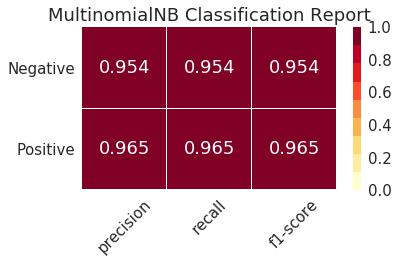

In [313]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Positive', 'Negative'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

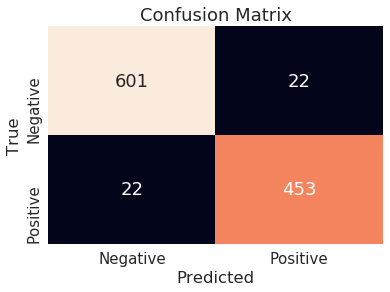

In [314]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()